# 1. Introduction
In this assignment, we are going to implement various data structures to determine the amount of resources (such as time and storage) necessary to execute a particular algorithm. Specifically, we need to implement 5 tasks:<br>
-Writing factorial algorithms using three different approaches(iterative,tail amd non tail recursive)<br>
-Plotting their running time<br>
-Use one of the above sequence as input to write binary search algorithm using two different appraoches(iterative and recursive)<br>
-Computing and plotting their running time<br>
-Use curve-fitting algorithms to find the equation of the running times plotted above<br>
In the following parts, solutions for the tasks will be shown step by step with explaination of each algorithm implemented and each decision made.
<br>

# 2. Fatorial algorithms running time with different approaches
In the first part of the assignment, we are going to compare the running time of different algorithms to compute the factorial of a positive integer n. We first write down the three different algorithms that we are going to compare with, they are iterative, non-tail recursive and tail recursive approaches respectively. 

## Iterative algorithm 
This algorithm is the iterative implementation of factorial. It will take a natural number n, set a variabel fact equals n, using a loop to keep multiplying fact by n until n is less than 1, and fianlly return the n-th factorial number as output.

In [1]:
def factorial_iterative(n):  
    fact = n
    while n>1:
        n=n-1
        fact=fact*n
    return fact  

## Non-tail recursive algorithm
This algorithm is the non tail recursive implementation of factorial. It will take a natural number n, multiply the return value by n, and do the multiplication back after getting the results of the base case (which is 1). The output of this algorithm is the n-th factorial number as output.

In [2]:
def factorial_non_tail(n):
    if n==1:
        return 1
    else:
        return n*factorial_non_tail(n-1)

## Tail recursive algorithm
This algorithm is the tail recursive implementation of factorial. It will take two natural numbers, n and an accumulator as inputs. The accumulator is used for the total and the function finishes at the tail, i.e. we don’t have to do the multiplication back. The idea is to use one more argument and accumulate the value of factorial in the second argument. When n reaches 1, the accumulated value will be returned. The output of this algorithm is the n-th factorial number as output.

In [3]:
def factorial_tail(n,accumulator=1):
    if n==1:
        return accumulator
    else:
        return factorial_tail(n-1,n*accumulator)

## Running time of each approach
After implementing the algorithms for calculating factorials, we can proceed to compute their running time. Here a function call Factorial_RunningTime is used to do this. we first create a numlist of 1 to 1000 and three empty lists for putting the running time of the three algorithms respectively. <br>
**Here the list from 1 to 1000 is used because for large inputs, the growth rate of a function can be less affected by constant factors and lower order terms(lecture 3)**, it is thus can show a more precise and clear difference between the running times.<br>
The function will take a factorial-calculating function(the factorial algorithm) and a empty time list as input. Inside the function, for each element of numlist, we calculate the time for running the factorial-calculating function using perf_counter(), and append the running time to the corresponing time list. Note that the running time is converted to microseconds(*1e6) to enhance redability. 

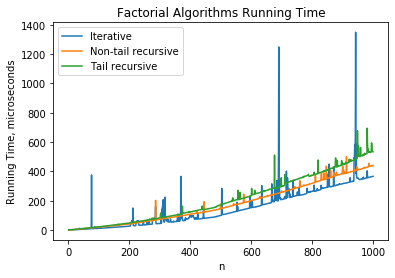

In [25]:
import numpy as np
import time
from time import perf_counter 
from matplotlib.pyplot import figure
numList1=[n for n in range(1,1000)]  
time_iterative=[]
time_nonTail=[]
time_tail=[]
def Factorial_RunningTime(func,t):
    for i in numList1:
        start=perf_counter()  #get the time before running the function
        func(i)
        end=perf_counter()  #get the time after running the function
        ElapsedTime=end-start #get the running time by subtracting the two times
        t.append(ElapsedTime*1e6) #convert to microsecond for highre redability
    
Factorial_RunningTime(factorial_iterative,time_iterative)
Factorial_RunningTime(factorial_non_tail,time_nonTail)
Factorial_RunningTime(factorial_tail,time_tail)

import matplotlib.pyplot as plt
plt.plot(numList1,time_iterative)
plt.plot(numList1,time_nonTail)
plt.plot(numList1,time_tail)
plt.ylabel('Running Time, microseconds')
plt.xlabel('n')
plt.title('Factorial Algorithms Running Time')
plt.legend(['Iterative', 'Non-tail recursive', 'Tail recursive'], loc='upper left')

#Remove the whitespace around the image with: bbox_inches='tight', reference: https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it-using-matplotlib
# plt.savefig('Factorial Algorithms Running Time.pdf', bbox_inches='tight') 
plt.show()

The three running times are plotted in the same graph for better and more visual comparison. We can see clearly from the plotted graph that as input size grows, iterative algorithm has the least running time, follow by non-tail recursive algorithm, and the tail recursive one has the longest running time.
This means that in terms of speed(best to worst): **iterative > non-tail recursive > tail recursive**<br>

In fact, theoritically the running time of non-tail recursive should be the longest, follow by tail recursive, and iterative should still have shortest running time.This is because for non-tail recursive, we have to call the function itself per activation and do the multiplication back after reaching the best case, so it spends most time for running. For tail recursive, although the fuction stil have to call the function itself at each activation, it doesn't need to do the multiplication back and simply return the accumulator after reaching the best case, that's why it is faster than the non-tail one. As for iterative function, all the computation are done within a loop and it only returns one time. Since it doesn't need to call itself over and over again at all, it is the fastest. More detailed analysis of the running time difference in terms of stack use will be further discussed in the space complexity part belows.<br>

However, since python doesn't support tail-call optimization(becuase the personal preference of the author of python), our tail function thus become the slowest among three functions, which does not match their theoritical running time difference.

## Time complexity of each approach
Time complexity of an algorithm quantifies the amount of time taken by an algorithm to run as a function of the length of the input.<br>

Although the running time of the three approaches are different, we can see from the grapth that the **time complexity of each approach are the same**, yet they all seems deviate from the time complexity that they suppose to have----from the three algorithms of factorials, the number of activations as well as time complexity of the algorithms are **O(n)** since the time of computation should be proportional as n increases (e.g. 3 for n = 3).<br>

Thus, the three lines plotted should all be linear theoritically. The reason why they appear as exponential slopes is because of the compilers. Each complier has its own optimizing architecture that endeavour to speed up the computer programs it execute, thus the time complexity plotted might be different from the shape they are supposed to be like.

## Space complexity of each approach
Space complexity is a measure of the amount of memory an algorithm needs. <br>
For the iterative algorithm, since only one variable n is allocated and only one single stack frame are called, so for the whole algorithm only take up O(1) space for the variable created and the stack frame called, no extra space is needed to be allocated for addition recursive calls. Therefore, the space complexity of the iterative algorithm is **O(1)**.<br>

For the tail recursive algorithm, altough recursive calls are made. But since in the recursive process, the value of n keep storing in the accumulator until the base case is reached, no extra stacks needed to be called and thus there is only one call, the current call, in the stack. Therefore, the space complexity of the tail recursive algorithm is also **O(1)**.<br>

The situation is different for the non-tail recursive algorithm. Since the basic idea behind non-tail recursion is that every call has a unique context (own memory address, own values for parameters and variables), then if we use a recursive approach, a recursive call has to be made at each stage. That means leaving the current invocation on the stack, and calling a new one, until we get the result of the base case, and the compiler can finally pass the result back and removes the stacks. That means when we're k levels deep, we've got k lots of stack frame, so the space complexity ends up being proportional to the depth we have to search. Therefore, the space complexity of the non-tail recursive algorithm is  **O(n)**.



# Outliers in the graphs
We can see from all graphs plotted from the algorithms above that there are some abnormal high data(the outliers) from time to time, this again is because of the optimazation of the compiler and thus the data won't be perfect and the line won't appear as a perfect shape.

# 3. Binary search algorithms running time with different approaches
In this part, we are going to use one of the sequences obtained from last part as an input for two binary search algorithms: iterative and recursive. Then for each approach, we will compute and plot the best and worst running times.

## Creating factorial list
Sequence obtained by iterative algorithm is chosen here. We use a simple function to create a factorial list for the binary search algorithms based on the input size n.

In [5]:
def create_factorial_list(n):
    factorial_list=[]    
    for i in range(1,n+1):
        factorial_list+=[factorial_iterative(i)] #iterative algorithm is used to compute fatorial
    return factorial_list

## Iterative binary search algorithm
This algorithm is an binary search algorithm using iterative approach. It will take a **sorted list** and an search element to be found as inputs. Inside the function, after setting low to 0 and high to length of the sorted list minus 1, a while loop is used as long as low is smaller than high.We'll try find the middle element(middle) in the sorted list and compare the search element with the middle. If they match, then return it. Else if they don't, then check whether the search element is smaller or larger than the middle element(keep left part of the middle element if smaller and keep right part if larger), and repeat the same procedure until we find the search element or there is only only one element left. If that ellement is not equal to the search element, return -1.

In [6]:

def iterative_binary_search(data, element):
   
    
    low = 0
    high = len(data) - 1

    while low <= high:
      
        middle = (low + high)//2  #find the middle element 
       
        if data[middle] == element:
            return middle           #return it if match with the search element 
        elif data[middle] > element:     
            high = middle - 1        #keep left part if middle is larger than search element 
        else:
            low = middle + 1        #keep right part if middle is smaller than search element 

    return -1

## Recursive binary search algorithm
This algorithm is an binary search algorithm using recursive approach. It will take a sorted list, an search element, a left(l) that initialised as 0 and a right(r) that initialised as None as inputs. Inside the function, after setting r to length of the sorted list minus 1, we check if l smaller than r(check if it is a non-empty list) and return -1 if it is. Then we'll try find the middle element(middle) in the sorted list and compare the search element with the middle. If they match, then return it. Else if they don't, then check whether the search element is smaller or larger than the middle element, apply the same function with middle element minus 1 as r if smaller(keep finding in left sublist); apply the same function with middle element plus 1 as l if smaller(keep finding in right sublist), and repeat the same procedure until we find the search element or there is only only one element left. 

In [7]:
def recursive_binary_Search (data, element,l=0, r=None): 
    if r==None:
        r=len(data)-1
    if l>r:
        return -1
    middle = l + (r - l)//2

    if data[middle] == element: # If element is present at the middle itself 
        return middle
    elif data[middle] > element: 
        return recursive_binary_Search(data,element, l, middle-1, ) # If element is smaller than mid, then keep finding in left sublist
    else: 
        return recursive_binary_Search(data,element, middle+1, r )    # Else keep finding in right sublist

## Binary search worst case running time
After implementing the algorithms of binary search, we can proceed to compute their running time. Here a function call BinarySearch_WorstCaseTime is used to find the worst running time. we first create a numlist of 1 up to 500 n and two empty lists for putting the running time of implementing with iteratie and recursive approach respectively. Here the list from 1 to 500 instead of 1 to 1000 is used is because for binary search algorithm the running time will be longer than factorial with the same input size, so in order not to wait so long for the result but at the same time have a relatively large input size that the growth rate of a function can be less affected by constant factors and lower order terms, 500 is used here. The function will take a empty time list and a binarySearch-calculating function as inputs.<br>
Inside the function, for 1 up to the number in numlist, we create a factorial list up to that number, then 
compute the binarySearch function with the factorial list as data list and 1 as search element. **Here 1 is used since we want to caculate the running time of finding number at the edge of the factorial list, i.e. the worst case.**
Then we again compute the running time by using perf_counter(), and append the running time with microseconds(*1e6) as units to the corresponing time list.

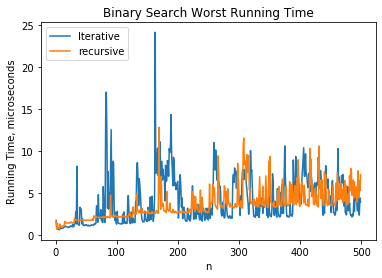

In [29]:
time_worst_iteratie=[]
time_worst_recursive=[]
def BinarySearch_WorstCaseTime(timeList,func):
    for i in numlist2:
        fac_list=create_factorial_list(i)
        start=perf_counter() 
        func(fac_list, 1)  #use a number at the edge of factorial list as search element
        end=perf_counter() 
        ElapsedTime=end-start
        timeList.append(ElapsedTime*1e6)  
    return timeList

numlist2=[i for i in range(1,500)]

t_WorstCase_iterative=[i for i in BinarySearch_WorstCaseTime(time_worst_iteratie, iterative_binary_search)]
t_WorstCase_recursive=[i for i in BinarySearch_WorstCaseTime(time_worst_recursive, recursive_binary_Search)]

import matplotlib.pyplot as plt
plt.plot(numlist2,t_WorstCase_iterative)
plt.plot(numlist2,t_WorstCase_recursive)
plt.ylabel('Running Time, microseconds')
plt.xlabel('n')
plt.legend(['Iterative', 'recursive'], loc='upper left')
plt.title('Binary Search Worst Running Time')
# plt.savefig('Binary Search Worst Running Time.pdf', bbox_inches='tight') 
plt.show()

The two running times are plotted in the same graph for better and more visual comparison. We can see from the plotted graph that as input size grows, iterative algorithm is faster than the recursive algorithm.
This means that in terms of speed(best to worst): **iterative > recursive**<br>
As mentioned in the running time session of last part, this is because for recursive approach, we have to call the function itself over and over again and do the multiplication back after reaching the best case, so it requires more time for running. While for iterative approach, all the computation are done within a loop and it only returns one time, so it can run faster.

## Time Complexity

Since the mechanism for binary search is that it comprares the search element with the middle elemnt of the array and if they are not the same, it will continue to search in the half that the search element is possible to lie, the worst case can only be reached when the searching algorithm touches the nethermost part of the binary tree. Therefore, the worst case time complexity for both iterative and recursive approaches are **O(log n)**.
<br>

But when looking at the graph, we can see that the running time plotted with recursive appraoch do show a logarithmic shape, yet the logarithmic shape of the one with iterative approach is not obvious. I considered that this might because of:
- the optimazation tendency of the compiler as mentioned before
- the cpu of my computer also needs to run various applications and programs, which cause a decrease of precision of the data.

The data might thus not be very accurate and as a result showing a not-so-logarithmic line that cannot truely reflect its time complexity.

## Space Complexity
For recursive approach of binary search algorithm, since the algorithm searchs for middle element at each time until it reaches the deepest of the binary tree, and a new stack space is allocated per recursive call, the space complexity of recursive binary search is **o(logn)**. For example, for an array of size 7(from 0 to 6), we have to call the recursive function 3 times and thus allocate three stack frames(1st search 6/2=3rd element in the array, 2nd search 4/2=2rd element in the array, 3rd search 2/2=1st element in the array), so the calls needed is 3(~log7).

For the iterative approach, since no matter how many times we need to loop through the array, we use only one stack frame and don't need to call the function again and again, the space complexity of the it is **O(1)**.

## Binary search best case running time
After implementing the algorithms of binary search, we can proceed to compute their running time. Here a function call BinarySearch_BestCaseTime is used to find the best running time. The whole process of calculation are basically the same with the worst case one, except for the serach element. Instead of using the number 1, **we will need to use the number at the middle of the each factorial list created in the loop, i.e. the best case**, in order to calculate the best running time. We first get the index of that element by getting the length of the list, minus it by one, dividing it by 2, and then get the quotient. After that, we get the search element by that index and put it in the function.

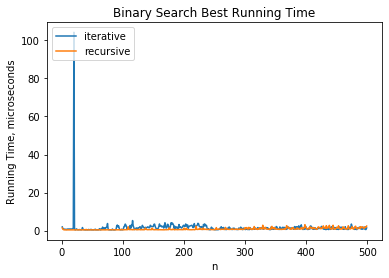

In [38]:
time_best_iterative=[]
time_best_recursive=[]
def BinarySearch_BestCaseTime(timeList,func):
   
    for i in numlist2:
        fac_list=create_factorial_list(i)
        index=(len(fac_list)-1)//2 #find the index of middle element
        num=fac_list[index]   ##get the middle element as serch element
        start=perf_counter() 
        func(fac_list,num)
        end=perf_counter() 
        ElapsedTime=end-start
        timeList.append(ElapsedTime*1e6)  
    return timeList

t_BestCase_iterative=[i for i in BinarySearch_BestCaseTime(time_best_iterative, iterative_binary_search)]
t_BestCase_recursive=[i for i in BinarySearch_BestCaseTime(time_best_recursive, recursive_binary_Search)]


import matplotlib.pyplot as plt
plt.plot(numlist2,t_BestCase_iterative)
plt.plot(numlist2,t_BestCase_recursive)
plt.ylabel('Running Time, microseconds')
plt.xlabel('n')
plt.legend(['iterative', 'recursive'], loc='upper left')
plt.title('Binary Search Best Running Time')
plt.savefig('Binary Search Best Running Time.pdf', bbox_inches='tight') 
plt.show()

The two running times are plotted in the same graph for better and more visual comparison. We can see clearly from the plotted graph that as input size grows, iterative algorithm has almost identical running time as the recursive one, both of them use nearly no time fot computing the best running time even if the input size is growing.
This means that in terms of speed(best to worst): **iterative ≈ recursive**<br>

## Time Complexity
We can see from the grapth that the **running time for both approaches didn't grow as the input size increases**, which means the time complexity of both approaches are the same and they both have constant running time, i.e. **time complexity is O(1)**.

## Space Complexity
Although by doing recursion, we have to call a new stack for each recusive call, **the space complexity of the recursive approach is O(1), which is the same with the iterative approach**. This is because when computing the best case running time, we take the first element we encounter(the middle one) as the search element, so for both approaches, the algorithm will match the middle element with the search element and can finish the algorithm right away. Therefore, even for the recursive approach, we won't execute the else part, don't need to call the function again and again, and thus won't take up more spaces.

# Outliers in the graphs
Again, we can see from all graphs plotted in this part that there are some abnormal high data(the outliers) from time to time, this is because of the optimazation of the compiler and thus the data won't be perfect and the line won't appear as a perfect shape.

# 4. Curve fitting 
In this part, we are going to use curve-fitting algorithms to find the best fit equation of the running times obtained from the previous parts. With the curve-fitting algorithms, we can see clearly that theoritically and ideally what the line-plotted should be like. 

## Analysis of factorial running time's curve fitting
We can see that theoritically the running time line plotted should be linear and the lines plotted from the three factorial algorithms can all basically follow the trend of the fitting curve, except the expoential tendency that have already disscused in the second part.

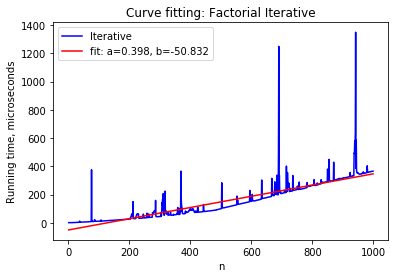

In [30]:
from scipy.optimize import curve_fit

def fit_1(x,a,b):    #Define a function(here a linear function is used)
    return a*x+b

#put in the data to be fit
xdata=np.array(numList1)
ydata1=np.array(time_iterative)

#Fit for the parameters a, b of the function fit_1:
param1, params_covariance1 = curve_fit(fit_1, xdata, ydata1)

plt.figure()
plt.plot(xdata,ydata1,'b',label="Iterative")
#putting the * so that the plot can expand out the terms into the a, b that function is expecting.
plt.plot(xdata,fit_1(xdata,*param1),'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(param1))
plt.title('Curve fitting: Factorial Iterative')
plt.legend()
plt.xlabel('n')
plt.ylabel('Running time, microseconds')
# plt.savefig('Curve fitting: Factorial Iterative.pdf', bbox_inches='tight') 
plt.show()

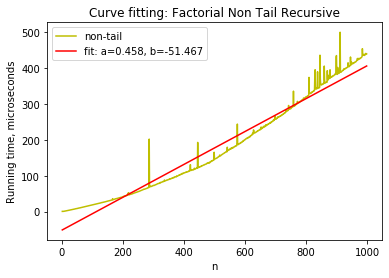

In [31]:
ydata2=np.array(time_nonTail)
param2, params_covariance2 = curve_fit(fit_1, xdata, ydata2)
plt.plot(xdata,ydata2,'y',label="non-tail")
plt.plot(xdata,fit_1(xdata,*param2),'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(param2))
plt.legend()
plt.xlabel('n')
plt.ylabel('Running time, microseconds')
plt.title('Curve fitting: Factorial Non Tail Recursive')
# plt.savefig('Curve fitting: Factorial Non Tail Recursive.pdf', bbox_inches='tight') 
plt.show()

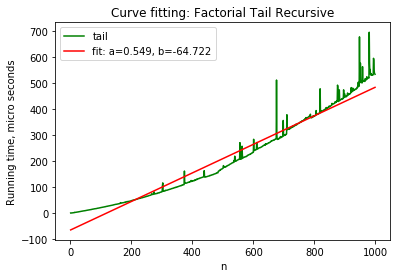

In [32]:
ydata3=np.array(time_tail)
param3, params_covariance3 = curve_fit(fit_1, xdata, ydata3)
plt.plot(xdata,ydata3,'g',label="tail")
plt.plot(xdata,fit_1(xdata,*param3),'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(param3))
plt.legend()
plt.xlabel('n')
plt.ylabel('Running time, micro seconds')
plt.title('Curve fitting: Factorial Tail Recursive')
# plt.savefig('Curve fitting: Factorial Tail Recursive.pdf', bbox_inches='tight') 
plt.show()

## Analysis of binary worst case running time's curve fitting
We can see that for both algorithms, theoritically the curves should be logarithmic. However, tn the two graphs, the running time plotted with recursive appraoch do show a logarithmic shape and fits well with the fitting curve, yet the logarithmic shape of the one with iterative approach is not obvious, because of the reason that mentioned in the third part.

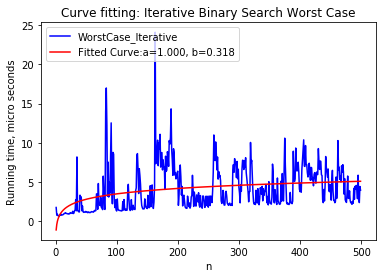

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

def fit_2(x, a, b):
      return np.log(b * x) 

x_data = np.array(numlist2)  

y_data4 = np.array(t_WorstCase_iterative)

param4,params_covariance4 = curve_fit(fit_2, x_data,y_data4,bounds=(0,np.inf)) #use a bound to prevent RuntimeWarning: invalid value encountered in log since now the parameters have a lower bound of 0

plt.figure()
plt.plot(x_data, y_data4, 'b', label="WorstCase_Iterative")

plt.plot(x_data, fit_2(x_data, *param4), 'r-', label="Fitted Curve:a=%5.3f, b=%5.3f"% tuple(param4))
plt.title('Curve fitting: Iterative Binary Search Worst Case')
# plt.savefig('Curve fitting: Iterative Binary Search Worst Case.pdf', bbox_inches='tight') 
plt.xlabel('n')
plt.ylabel('Running time, micro seconds')
plt.legend(loc='upper left')
plt.show()

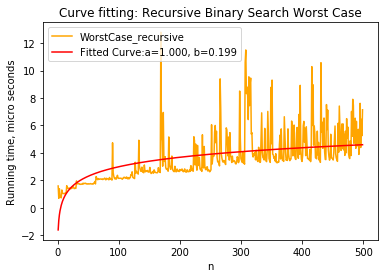

In [44]:
y_data5 = np.array(t_WorstCase_recursive)

param5, params_covariance5 = curve_fit(fit_2, x_data,y_data5,bounds=(0,np.inf)) #use a bound to prevent RuntimeWarning: invalid value encountered in log since now the parameters have a lower bound of 0
plt.figure()
plt.plot(x_data, y_data5, 'orange' , label="WorstCase_recursive")
plt.plot(x_data, fit_2(x_data, *param5), 'r-', label="Fitted Curve:a=%5.3f, b=%5.3f" % tuple(param5))

plt.title('Curve fitting: Recursive Binary Search Worst Case')

plt.xlabel('n')
plt.ylabel('Running time, micro seconds')
plt.legend(loc='upper left')
# plt.savefig('Curve fitting: Recursive Binary Search Worst Case.pdf', bbox_inches='tight') 
plt.show()

## Analysis of binary best case running time's curve fitting
We can see that theoritically the curves for binary best case running time should be constant. The lines plotted from the two algorithms fit well with the fitted curve if ommited a few numbers of outliers.

/Users/chungwingki/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


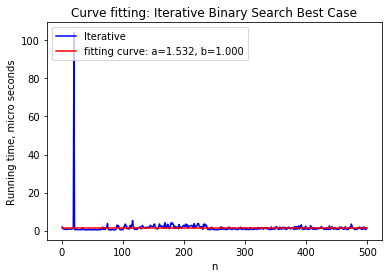

In [43]:
def fit_3(x,a,b):
    return a

# #put in the data to be fit
ydata7=np.array(t_BestCase_iterative)

#Fit for the parameters a, b of the function fit_1:
param6, params_covariance6 = curve_fit(fit_3, x_data, ydata7)
plt.figure()
plt.plot(x_data,ydata7,'b',label="Iterative")
fitting_number1=fit_3(x_data,*param6)
fitting_list1=[fitting_number1 for i in range(499) ]
#the * when you plot will expand out the terms into the a, b that func is expecting.
plt.plot(x_data,fitting_list1,'r-',label='fitting curve: a=%5.3f, b=%5.3f' % tuple(param6))
plt.title('Curve fitting: Iterative Binary Search Best Case')
plt.xlabel('n')
plt.ylabel('Running time, micro seconds')
plt.legend(loc='upper left')
# plt.savefig('Curve fitting: Iterative Binary Search Best Case.pdf', bbox_inches='tight') 
plt.show()

/Users/chungwingki/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


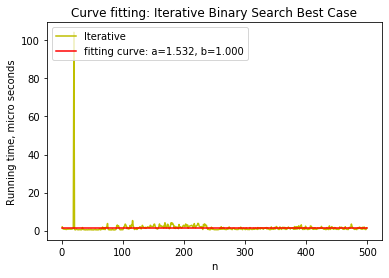

In [40]:
#put in the data to be fit
ydata8=np.array(t_BestCase_recursive)

#Fit for the parameters a, b of the function fit_1:
param7, params_covariance7 = curve_fit(fit_3, x_data, ydata7)
plt.figure()
plt.plot(x_data,ydata7,'y',label="Iterative")
fitting_number2=fit_3(x_data,*param7)
fitting_list2=[fitting_number2 for i in range(499) ]
#the * when you plot will expand out the terms into the a, b that func is expecting.
plt.plot(x_data,fitting_list2,'r-',label='fitting curve: a=%5.3f, b=%5.3f' % tuple(param7))
plt.title('Curve fitting: Iterative Binary Search Best Case')
plt.xlabel('n')
plt.ylabel('Running time, micro seconds')
plt.legend(loc='upper left')
# plt.savefig('Curve fitting: Recuesive Binary Search Best Case.pdf', bbox_inches='tight') 
plt.show()

## 5. Unit test
In this part, unit tests are provided to test the key functionality of the program. All functions work well and no error found.

In [41]:
import unittest


class TestFactorial(unittest.TestCase):
    
    def testIterative(self):
        t = factorial_iterative(5)
        self.assertTrue(t == 120)      
    def testTail(self):
        t = factorial_non_tail(5)
        self.assertTrue(t == 120)  
    def testNonTail(self):
        t = factorial_tail(5)
        self.assertEqual(t, 120) 
    def testCreateFac(self):
        t = create_factorial_list(5)
        self.assertTrue(t == [1, 2, 6, 24, 120]) 

class TestBinarySearch(unittest.TestCase):
    
    def testBinaryIterative(self):
        t = iterative_binary_search([1, 2, 6, 24, 120], 24)
        self.assertTrue(t == 3)  
        
    def testBinaryRecursive(self):
        t = recursive_binary_Search([1, 2, 6, 24, 120], 24,l = 0, r = None)
        self.assertTrue(t == 3)  
      
unittest.main(argv=[''], verbosity=2, exit=False)

testBinaryIterative (__main__.TestBinarySearch) ... ok
testBinaryRecursive (__main__.TestBinarySearch) ... ok
testCreateFac (__main__.TestFactorial) ... ok
testIterative (__main__.TestFactorial) ... ok
testNonTail (__main__.TestFactorial) ... ok
testTail (__main__.TestFactorial) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.007s

OK


## References:
https://www.hackerearth.com/zh/practice/basic-programming/complexity-analysis/time-and-space-complexity/tutorial/
https://brightspace.ucd.ie/d2l/le/content/57812/viewContent/807800/View
https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
https://zhuanlan.zhihu.com/p/37869744
https://stackoverflow.com/questions/31408782/scipy-curve-fitting-negative-value
https://en.wikipedia.org/wiki/Binary_search_algorithm#Running_time_and_cache_use